In [ ]:
 ## Lab- 3
 ## To perform Logistic regression
 ## Task 1 and Task 4

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
## Generate the dataset for logistic regression
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

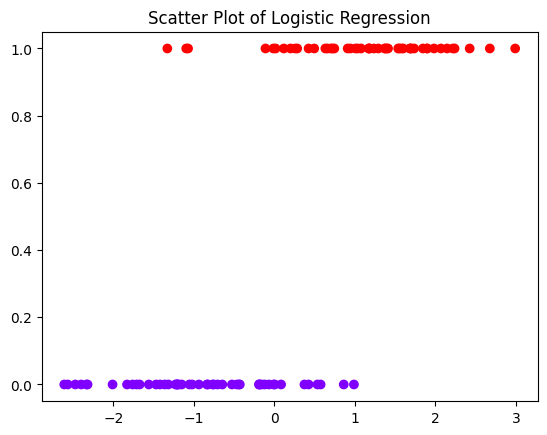

In [3]:
plt.scatter(x, y, c=y, cmap='rainbow') ## Create a scatter plot
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [4]:
df = pd.DataFrame({'x': x[:, 0], 'y': y})
print(df)

           x  y
0   1.169924  1
1  -1.150086  0
2  -0.187652  0
3   0.943976  1
4  -0.646417  0
..       ... ..
95 -0.936954  0
96  0.083324  0
97  1.735223  1
98  1.410928  1
99  1.008411  1

[100 rows x 2 columns]


In [5]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [6]:

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [7]:
print(log_reg.coef_)
print(log_reg.intercept_)


[[1.9517856]]
[-0.26007771]


In [9]:

y_pred = log_reg.predict(x_test)

In [10]:

confusion_matrix(y_test, y_pred)

array([[10,  2],
       [ 1, 12]])

In [11]:
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]

In [12]:
df=pd.DataFrame({'x=actual':y_test, 'predicted': y_pred})
df

,x=actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


In [13]:
df = pd.DataFrame({'x_train': x_train.flatten(), 'y_train': y_train})
df

,x_train,y_train
0,0.015414,1
1,0.704643,1
2,-2.608599,0
3,-0.012806,1
4,-1.759084,0
...,...,...
70,1.684677,1
71,-1.020168,0
72,-0.527121,0
73,-1.419823,0


In [14]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = log_reg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


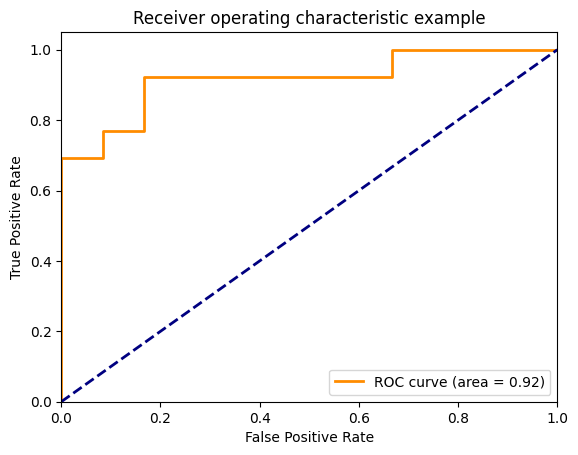

In [15]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()